In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")

In [41]:
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [42]:
df.info

<bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  seve

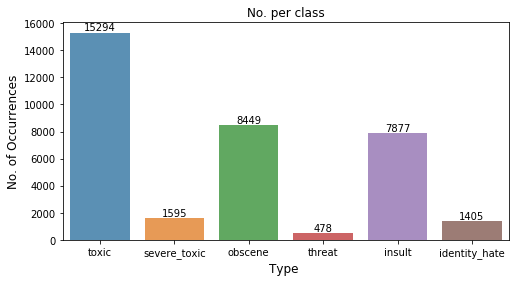

In [43]:
#import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
x1=df.iloc[:,2:].sum()
x=x1.dropna()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("No. per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [44]:
comments=df[['comment_text']]
toxic=df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]
toxic.head(5)


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [45]:
df['label']='' # to create an empty column
for col_name in df.columns:
    df.loc[df[col_name]==1,'label']= "Toxic"
print(df.head(10))




                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  label  
0             0        0       0       0   

In [46]:
df1=df.replace(r'^\s*$', np.nan, regex=True)
df1


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,NaN
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,NaN
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,NaN
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,NaN
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,NaN
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,NaN
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,NaN
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,NaN


In [47]:
df1['label'].fillna("Non toxic",inplace=True)
df1.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Non toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Non toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Non toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,Non toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,Non toxic
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,Non toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,Toxic
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,Non toxic
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,Non toxic
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,Non toxic


In [48]:
df1['label'].value_counts()

Non toxic    143346
Toxic         16225
Name: label, dtype: int64

In [49]:
toxic=len(df1[df1['label'] == "Toxic"])
toxic

16225

In [50]:
toxic= df1[df1['label'] == "Toxic"].index
random_indices1 = np.random.choice(toxic,16225,replace=False)
toxic_sample = df1.loc[random_indices1]

In [51]:
nontoxic= df1[df1['label'] == "Non toxic"].index
random_indices2 = np.random.choice(nontoxic,size=16225,replace=False)
nontoxic_sample = df1.loc[random_indices2]

In [52]:
len(nontoxic_sample)

16225

In [53]:
under_sample_indices= np.concatenate([random_indices1,random_indices2])

In [54]:
len(under_sample_indices)

32450

In [55]:
under_sample = df1.loc[under_sample_indices] #cant use value_counts here ?

In [56]:
under_sample.info

<bound method DataFrame.info of                       id                                       comment_text  \
45929   7abe76f58ae4a62e  fuck you \n\nFunny how a wikipedia article i t...   
109717  4ad67d7e23c32f45  AND YOU, YAMLA, CAN BLOW IT OUT OF YOUR BIG FA...   
72891   c2ff7cee1a3bd9e8  "\n\nPlease, watch the edit history of Sayersl...   
116391  6e30ac9f106693b0  please do not write me more!! Silly \n\nPerhap...   
120773  8622a6426aa6edc8  If you continue to vandalise, I'm gonna fuck y...   
...                  ...                                                ...   
100376  195816ef4d7a6b33  I admire your fortitude Anne. By all means cla...   
60014   a0a35669c2d74e7f  . It will helps the people and fellow of him t...   
65101   ae2eda6f1824d031  Sorry to pile on, but I too think there is lea...   
112796  5b649fde1dc0d6e1  "::::Aside from information about the shards, ...   
113410  5e83c246a7399cfa  "\n\n Experimental / Prototype architecture \n...   

        toxic  seve

In [57]:
import nltk as nlp
import re
description_list = []
for description in under_sample['comment_text']:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   
    description = nlp.word_tokenize(description)
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description) 

In [58]:
#We make bag of word it is including number of all word's info
from sklearn.feature_extraction.text import CountVectorizer 
max_features = 3000 #We use the most common word
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [59]:
#We separate our data is train and test
y = under_sample.iloc[:,8].values   
x = sparce_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)


In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
nb = GaussianNB()
nb.fit(x_train,y_train)
p=nb.predict(x_test)
print("the accuracy of our model: {}".format(nb.score(x_test,y_test)))
cm=confusion_matrix(y_test,p)
print(cm)
print(classification_report(p,y_test))

the accuracy of our model: 0.7713405238828968
[[1552   49]
 [ 693  951]]
              precision    recall  f1-score   support

   Non toxic       0.97      0.69      0.81      2245
       Toxic       0.58      0.95      0.72      1000

    accuracy                           0.77      3245
   macro avg       0.77      0.82      0.76      3245
weighted avg       0.85      0.77      0.78      3245



In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=2) accuracy is: ',knn.score(x_test,y_test))
cm=confusion_matrix(y_test,p)
print(cm)
print(classification_report(p,y_test))

With KNN (K=2) accuracy is:  0.7127889060092449
[[1479  122]
 [ 218 1426]]
              precision    recall  f1-score   support

   Non toxic       0.92      0.87      0.90      1697
       Toxic       0.87      0.92      0.89      1548

    accuracy                           0.90      3245
   macro avg       0.90      0.90      0.90      3245
weighted avg       0.90      0.90      0.90      3245



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
lr = RandomForestClassifier()
lr.fit(x_train,y_train)
p=lr.predict(x_test)
print("our accuracy is: {}".format(lr.score(x_test,y_test)))
cm=confusion_matrix(y_test,p)
print(cm)
print(classification_report(p,y_test))

C:\Users\ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


our accuracy is: 0.8375963020030817
[[1416  185]
 [ 342 1302]]
              precision    recall  f1-score   support

   Non toxic       0.88      0.81      0.84      1758
       Toxic       0.79      0.88      0.83      1487

    accuracy                           0.84      3245
   macro avg       0.84      0.84      0.84      3245
weighted avg       0.84      0.84      0.84      3245



In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 400)
lr.fit(x_train,y_train)
p=lr.predict(x_test)
print("our accuracy is: {}".format(lr.score(x_test,y_test)))
cm=confusion_matrix(y_test,p)
print(cm)
print(classification_report(p,y_test))

C:\Users\ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


our accuracy is: 0.8952234206471494
[[1479  122]
 [ 218 1426]]
              precision    recall  f1-score   support

   Non toxic       0.92      0.87      0.90      1697
       Toxic       0.87      0.92      0.89      1548

    accuracy                           0.90      3245
   macro avg       0.90      0.90      0.90      3245
weighted avg       0.90      0.90      0.90      3245

